In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier 

In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=a8153fbeb3ec3a00fef78430a199bbf77d0e0863485e155c78edea9a8e634337
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import imutils

In [4]:
def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten() #resize image and collapse into 1-dimension
def extract_color_histogram(image, bins=(8, 8, 8)):l
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten() # return the flattened histogram as the feature vector

In [5]:
imagePaths = []

for dirname, _, filenames in os.walk('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

#Should return true for our dataset.
len(imagePaths) == 219+1341+1345

True

In [8]:
rawImages = []
features = []
labels = []
img=[]

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    rawImages.append(pixels) #first feature vector
    features.append(hist) #second feature vector
    labels.append(label)
    img.append(image)

In [9]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 8.71MB
[INFO] features matrix: 5.81MB


In [14]:
X = pd.DataFrame(features)
y = pd.Series(labels)
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
recall = cross_val_score(svm, X, y, scoring='recall_macro', cv=cv)
print("Recall: ",np.mean(recall))
precision = cross_val_score(svm, X, y, scoring='precision_macro', cv=cv)
print("Precision: ",np.mean(precision))
accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv=cv)
print("Accuracy: ",np.mean(accuracy))
f1score = cross_val_score(svm, X, y, scoring='f1_macro', cv=cv)
print("F1 Score: ",np.mean(f1score))

Recall:  0.5839997423989234
Precision:  0.8257621555005601
Accuracy:  0.7487091222030982
F1 Score:  0.6008158906031821


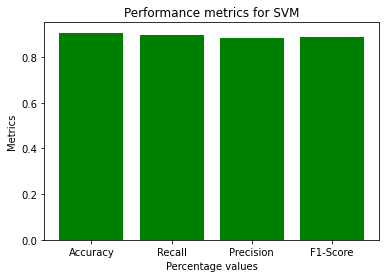

In [49]:
svm_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
svm_metric_values = [np.mean(accuracy), np.mean(recall), np.mean(precision), np.mean(f1score)]

svm_pos = [i for i, _ in enumerate(x)]

plt.bar(svm_pos, svm_metric_values , color='green')
plt.xlabel("Percentage values")
plt.ylabel("Metrics")
plt.title("Performance metrics for SVM")

plt.xticks(svm_pos, svm_metrics)

plt.show()

Recall:  0.8942326899157698
Precision:  0.9098601829769437
Accuracy:  0.9153184165232359
F1 Score:  0.9014394714160229


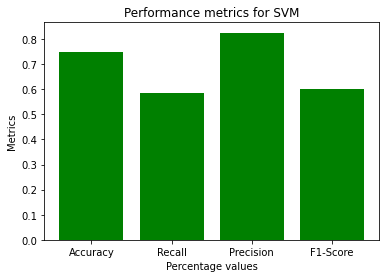

In [33]:
X = pd.DataFrame(rawImages)
y = pd.Series(labels)
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
svm = BaggingClassifier(base_estimator=svm, n_estimators=5, random_state=314).fit(X,y)
recall = cross_val_score(svm, X, y, scoring='recall_macro', cv=cv)
print("Recall: ",np.mean(recall))
precision = cross_val_score(svm, X, y, scoring='precision_macro', cv=cv)
print("Precision: ",np.mean(precision))
accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv=cv)
print("Accuracy: ",np.mean(accuracy))
f1score = cross_val_score(svm, X, y, scoring='f1_macro', cv=cv)
print("F1 Score: ",np.mean(f1score))
svm_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
svm_metric_values = [np.mean(accuracy), np.mean(recall), np.mean(precision), np.mean(f1score)]

svm_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Percentage values")
plt.ylabel("Metrics")
plt.title("Performance metrics for SVM")

plt.xticks(x_pos, x)

plt.show()

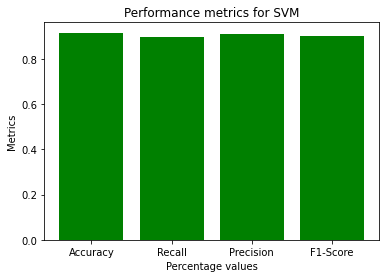

In [34]:
plt.bar(svm_pos, svm_metric_values, color='green')
plt.xlabel("Percentage values")
plt.ylabel("Metrics")
plt.title("Performance metrics for SVM")

plt.xticks(svm_pos, svm_metrics)

plt.show()

In [35]:
X = pd.DataFrame(rawImages)
y = pd.Series(labels)
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
#svm = BaggingClassifier(base_estimator=svm, n_estimators=5, random_state=314).fit(X,y)
recall = cross_val_score(svm, X, y, scoring='recall_macro', cv=cv)
print("Recall: ",np.mean(recall))
precision = cross_val_score(svm, X, y, scoring='precision_macro', cv=cv)
print("Precision: ",np.mean(precision))
accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv=cv)
print("Accuracy: ",np.mean(accuracy))
f1score = cross_val_score(svm, X, y, scoring='f1_macro', cv=cv)
print("F1 Score: ",np.mean(f1score))
svm_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
svm_metric_values = [np.mean(accuracy), np.mean(recall), np.mean(precision), np.mean(f1score)]

Recall:  0.8999211569824596
Precision:  0.8885381257762649
Accuracy:  0.906024096385542
F1 Score:  0.8934844002414492


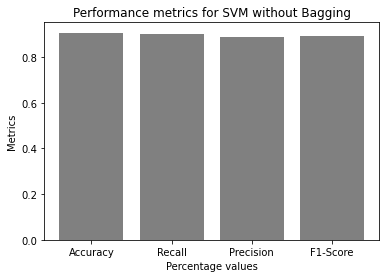

In [37]:
plt.bar(svm_pos, svm_metric_values, color='gray')
plt.xlabel("Percentage values")
plt.ylabel("Metrics")
plt.title("Performance metrics for SVM without Bagging")

plt.xticks(svm_pos, svm_metrics)

plt.show()

In [38]:
splits = [x for x in range(2,7)]
recall_final = []
precision_final = []
accuracy_final = []
f1_final = []
for split in splits:
    cv = KFold(n_splits=split, random_state=1, shuffle=True)
    recall = cross_val_score(svm, X, y, scoring='recall_macro', cv=cv)
    recall_final.append(np.mean(recall))
    precision = cross_val_score(svm, X, y, scoring='precision_macro', cv=cv)
    precision_final.append(np.mean(precision))
    accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv=cv)
    accuracy_final.append(np.mean(accuracy))
    f1score = cross_val_score(svm, X, y, scoring='f1_macro', cv=cv)
    f1_final.append(np.mean(f1score))
print("Recall: ",recall_final)
print("Precision: ",precision_final)
print("Accuracy: ",accuracy_final)
print("F1 Score: ",f1_final)

Recall:  [0.8920272186523404, 0.8889629324219013, 0.899510729619474, 0.8999211569824596, 0.8982981678090202]
Precision:  [0.8764556612159522, 0.8789930019183235, 0.8808913656829501, 0.8885381257762649, 0.8817863342087637]
Accuracy:  [0.9060268106833207, 0.9032706746610489, 0.9070570024365198, 0.906024096385542, 0.9063659083809036]
F1 Score:  [0.8834720431981302, 0.8835125306787006, 0.8886669987950944, 0.8934844002414492, 0.8892380819063203]


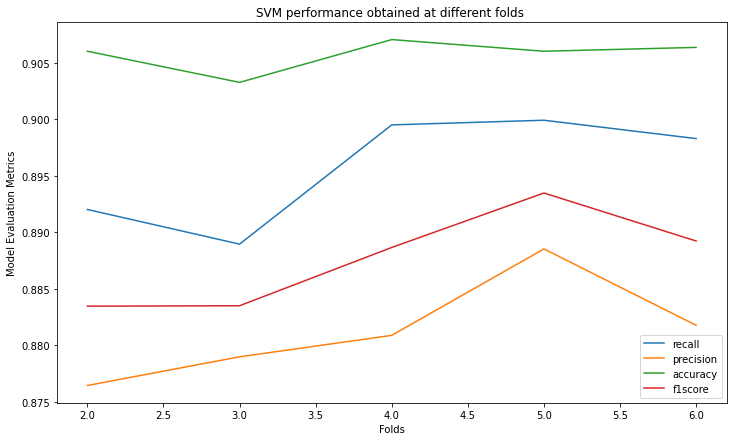

In [48]:
fig2 = plt.figure(figsize =(12, 7))
plt.plot(splits,recall_final, label='recall')
plt.plot(splits,precision_final, label='precision')
plt.plot(splits,accuracy_final, label='accuracy')
plt.plot(splits,f1_final, label='f1score')
plt.xlabel('Folds')
plt.ylabel('Model Evaluation Metrics')
plt.title('SVM performance obtained at different folds ')
plt.legend(loc='lower right')
plt.show()